<a href="https://colab.research.google.com/github/shravankoninti/mlcourse.ai-1/blob/master/Medium_code_v1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#train.csv

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1DTuYupJwzsqO3ST99gC9qUt-lFIRVmQe' #https://drive.google.com/open?id=1DTuYupJwzsqO3ST99gC9qUt-lFIRVmQe
downloaded = drive.CreateFile({'id': file_id})


In [0]:
downloaded.GetContentFile('train.csv')

In [0]:

file_id = '1Dy0AC_Yc0kTihNWxwXMYsU8ORPmm1N_q' #https://drive.google.com/open?id=1Dy0AC_Yc0kTihNWxwXMYsU8ORPmm1N_q
downloaded = drive.CreateFile({'id': file_id}) 
  
  

In [0]:
downloaded.GetContentFile('test.csv')

In [0]:

file_id = '1b-7WC4DccQ_PRXoU8GqZcLyHQJxgn-Xm' #https://drive.google.com/open?id=1b-7WC4DccQ_PRXoU8GqZcLyHQJxgn-Xm
downloaded = drive.CreateFile({'id': file_id}) 
  
  

In [0]:
downloaded.GetContentFile('train_log1p_recommends.csv')

In [0]:

file_id = '1LVjbFpNQs4eAafiIJLUX1JA_ieeFQdRo' #https://drive.google.com/open?id=1LVjbFpNQs4eAafiIJLUX1JA_ieeFQdRo
downloaded = drive.CreateFile({'id': file_id}) 
  
downloaded.GetContentFile('sample_submission.csv')

In [10]:
!ls

adc.json     sample_submission.csv  test.csv   train_log1p_recommends.csv
sample_data  submission.csv	    train.csv


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

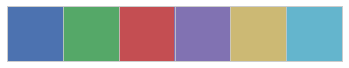

In [11]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import json
from tqdm import tqdm_notebook
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error


import numpy as np
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from scipy.sparse import csr_matrix, hstack
from scipy.stats import probplot
import pickle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns 
import gc
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.preprocessing import StandardScaler
from scipy.sparse import (csr_matrix, hstack)


import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import (PorterStemmer, WordNetLemmatizer)
from sklearn.feature_extraction.text import (CountVectorizer,
                                             TfidfVectorizer)
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import (RidgeCV, Ridge)
from sklearn.model_selection import (GridSearchCV, 
                                     cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler
from scipy.sparse import (csr_matrix, hstack)

import nltk
nltk.download("popular")
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS


color = sns.color_palette()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.palplot(color)

In [12]:
# read data from file
# train = pd.read_csv("../input/train.csv") 
# test = pd.read_csv("../input/test.csv")

train = pd.read_csv("train.csv", index_col = 0, encoding = 'utf-8') 
test = pd.read_csv("test.csv", index_col = 0 ,encoding = 'utf-8')

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 62313
Number of features in train: 14
Number of data points in test: 34645
Number of features in test: 13


In [13]:
train.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,target
0,Susan BrattonTrusted Hot Sex Advisor To Millio...,1970-01-01 00:00:00.001,Saving Your Marriage By Watching Steamy Sex Ed...,Susan Bratton,medium.com,Lovemaking Sex SexPositions EarlyBird SexEdVideos,5473,http://personallifemedia.com/2017/01/saving-ma...,3,1970,1,0,5,1.09861
1,"Ryo OoishiDec 31, 1969やってよかった中学受験明日から息子の中学受験がは...",1970-01-01 00:00:00.001,やってよかった中学受験,Ryo Ooishi,medium.com,NaN,5325,https://medium.com/@ooishi/%E3%82%84%E3%81%A3%...,3,1970,1,0,0,2.56495


In [14]:
test.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags
0,Member previewHITRECORDhitrecord.org is a new ...,2018-02-21 17:01:00.928,"For Night Owls, the Day Starts with a Nocturna...",HITRECORD,medium.com,MorningRoutines Hitrecord Podcast Night,12500,https://medium.com/on-mornings/nocturnalmornin...,2,2018,2,17,4
1,Member previewMaria Bustillosis a journalist a...,2017-12-07 15:56:00.967,Blockchain is Memory,Maria Bustillos,medium.com,Blockchain Technology History Network WordsTha...,6703,https://medium.com/wordsthatmatter/never-break...,3,2017,12,15,5


In [15]:
train.dtypes

content            object
published          object
title              object
author             object
domain             object
tags               object
length              int64
url                object
dow                 int64
year                int64
month               int64
hour                int64
number_of_tags      int64
target            float64
dtype: object

In [0]:
# plt.figure(1)
# plt.subplot(221)
# train['dow'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
# plt.title('dow', fontweight="bold", fontsize = 22.0)
# plt.ylabel('Count %', fontsize = 20.0)


# plt.subplot(222)
# train['year'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
# plt.title('year', fontweight="bold",fontsize = 22.0)
# plt.ylabel('Count %', fontsize = 20.0)

# plt.subplot(223)
# train['month'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
# plt.title('month', fontweight="bold", fontsize = 22.0)
# plt.ylabel('Count %', fontsize = 20.0)

# plt.subplot(224)
# train['hour'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
# plt.title('hour', fontweight="bold", fontsize = 22.0)
# plt.ylabel('Count %', fontsize = 20.0)
# plt.tight_layout()

In [0]:
# plt.figure(1)
# plt.subplot(121)
# sns.distplot(train['target'])


# plt.subplot(122)
# train['target'].plot.box(figsize=(16,5))

# plt.show()

In [0]:
# probplot(train.target.values, dist="norm", plot=plt);

In [0]:
# train.sort_values(by='target', ascending=False).reset_index(drop=True).loc[0, 'url']

## Other Features

In [0]:
# plt.figure(1)
# plt.subplot(221)
# train['domain'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
# plt.title('domain', fontweight="bold", fontsize = 22.0)
# plt.ylabel('Count %', fontsize = 20.0)
# plt.xticks(rotation=90)


# plt.subplot(222)
# test['domain'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
# plt.title('domain', fontweight="bold",fontsize = 22.0)
# plt.ylabel('Count %', fontsize = 20.0)
# plt.xticks(rotation=90)

# plt.subplot(223)
# train['month'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
# plt.title('month', fontweight="bold", fontsize = 22.0)
# plt.ylabel('Count %', fontsize = 20.0)

# plt.subplot(224)
# train['hour'].value_counts(normalize=True).plot.bar(figsize=(12,8), fontsize = 15.0)
# plt.title('hour', fontweight="bold", fontsize = 22.0)
# plt.ylabel('Count %', fontsize = 20.0)
# plt.tight_layout()

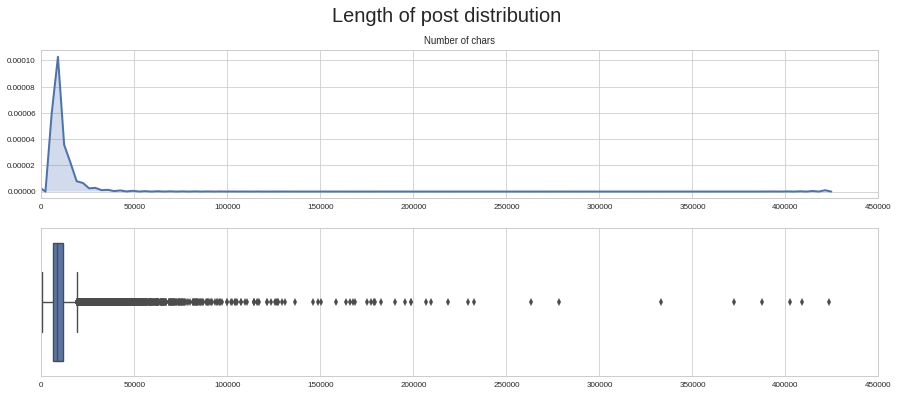

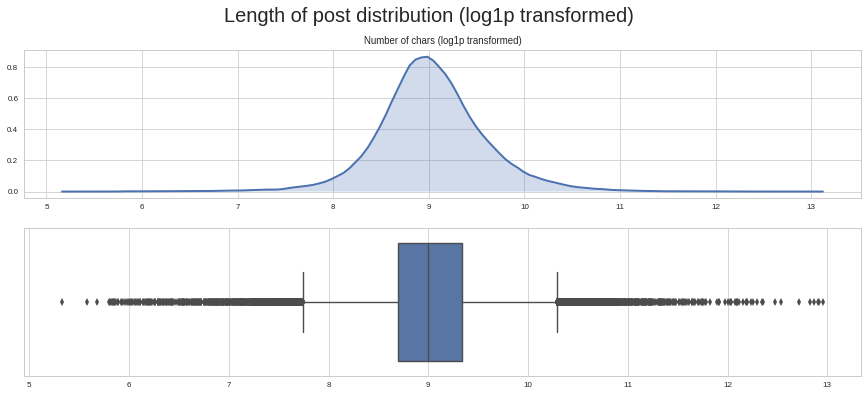

In [21]:
plt.figure(figsize=(15,6))
plt.suptitle("Length of post distribution",fontsize=20)
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1),(0,0))
plt.xlim(0, 450000)
sns.distplot(train.length.values, hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})
plt.title("Number of chars")

plt.subplot2grid((2,1),(1,0))
plt.xlim(0, 450000)
sns.boxplot(train.length.values);

plt.figure(figsize=(15,6))
plt.suptitle("Length of post distribution (log1p transformed)",fontsize=20)
gridspec.GridSpec(2,1)


plt.subplot2grid((2,1),(0,0))
sns.distplot(np.log1p(train.length.values), hist=False, color=color[0], kde_kws={"shade": True, "lw": 2})
plt.title("Number of chars (log1p transformed)")

plt.subplot2grid((2,1),(1,0))
sns.boxplot(np.log1p(train.length.values));

In [0]:
# content_train = train['content'].values.tolist()
# title_train = train['title'].values.tolist()
# tags_train = train['tags'].values.tolist()
# y_train = train['target'].values
# # train.drop(['content', 'title', 'target', 'tags', 'published', 'length', 'url'], axis=1, inplace=True)

# content_test = test['content'].values.tolist()
# title_test = test['title'].values.tolist()
# tags_test = test['tags'].values.tolist()
# # test.drop(['content', 'title', 'tags', 'published', 'length', 'url'], axis=1, inplace=True)

In [23]:
train.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,target
0,Susan BrattonTrusted Hot Sex Advisor To Millio...,1970-01-01 00:00:00.001,Saving Your Marriage By Watching Steamy Sex Ed...,Susan Bratton,medium.com,Lovemaking Sex SexPositions EarlyBird SexEdVideos,5473,http://personallifemedia.com/2017/01/saving-ma...,3,1970,1,0,5,1.09861
1,"Ryo OoishiDec 31, 1969やってよかった中学受験明日から息子の中学受験がは...",1970-01-01 00:00:00.001,やってよかった中学受験,Ryo Ooishi,medium.com,NaN,5325,https://medium.com/@ooishi/%E3%82%84%E3%81%A3%...,3,1970,1,0,0,2.56495


In [24]:
train.columns

Index(['content', 'published', 'title', 'author', 'domain', 'tags', 'length',
       'url', 'dow', 'year', 'month', 'hour', 'number_of_tags', 'target'],
      dtype='object')

In [25]:
test.head(2)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags
0,Member previewHITRECORDhitrecord.org is a new ...,2018-02-21 17:01:00.928,"For Night Owls, the Day Starts with a Nocturna...",HITRECORD,medium.com,MorningRoutines Hitrecord Podcast Night,12500,https://medium.com/on-mornings/nocturnalmornin...,2,2018,2,17,4
1,Member previewMaria Bustillosis a journalist a...,2017-12-07 15:56:00.967,Blockchain is Memory,Maria Bustillos,medium.com,Blockchain Technology History Network WordsTha...,6703,https://medium.com/wordsthatmatter/never-break...,3,2017,12,15,5


In [26]:
test.columns

Index(['content', 'published', 'title', 'author', 'domain', 'tags', 'length',
       'url', 'dow', 'year', 'month', 'hour', 'number_of_tags'],
      dtype='object')

In [27]:
print(train['year'].nunique())
print(train['domain'].nunique())
print(train['hour'].nunique())
print(train['month'].nunique())
print(train['dow'].nunique())
print(train['author'].nunique())

17
221
24
12
7
31331


In [0]:
# train = train[(train.year >= 2015) & (train['domain'] == 'medium.com')]
# test = test[(test.year >= 2015) & (test['domain'] == 'medium.com')]

In [29]:
print(train['year'].nunique())
print(train['domain'].nunique())
print(train['hour'].nunique())
print(train['month'].nunique())
print(train['dow'].nunique())
print(train['author'].nunique())

17
221
24
12
7
31331


In [30]:
%%time

idx_split = len(train)
df_full = pd.concat([train, test])
df_full['length'] = np.log1p(df_full['length'])
print(df_full['length'].describe())

bins = [5,7,9,11,14]

group_names = ['is_short', 'is_medium', 'is_long', 'is_huge']
df_full['content_length'] = pd.cut(df_full['length'], bins, labels=group_names)

df_full['published'] = df_full[['published']].apply(pd.to_datetime)


# Your code is here


df_full['holiday']     = (df_full['published'].dt.dayofweek >= 5).astype(int) 



df_full['work_hours'] = df_full['published'].apply(lambda ts: 1 if (ts.date().weekday() in (0,1,2,3,4)) &
                                             ((ts.hour>=8)&(ts.hour<=17)&(ts.hour!=12)) else 0)



list_to_dums = [ 'dow', 'month', 'hour',  'year', 'number_of_tags','content_length']
dummies = pd.get_dummies(df_full, columns = list_to_dums, drop_first=True,
                            prefix=list_to_dums, sparse=False)

X_train_feats = dummies.iloc[:idx_split, :]
X_test_feats = dummies.iloc[idx_split:, :]

print('TRAIN feats: {}'.format(X_train_feats.shape))
print('TEST feats: {}'.format(X_test_feats.shape))
del dummies, df_full
gc.collect()

count    96958.000000
mean         9.015384
std          0.566949
min          5.209486
25%          8.691483
50%          8.992806
75%          9.322776
max         13.311144
Name: length, dtype: float64
TRAIN feats: (62313, 77)
TEST feats: (34645, 77)
CPU times: user 1.1 s, sys: 19.7 ms, total: 1.11 s
Wall time: 1.13 s


In [31]:
X_train_feats.columns

Index(['author', 'content', 'domain', 'length', 'published', 'tags', 'target',
       'title', 'url', 'holiday', 'work_hours', 'dow_1', 'dow_2', 'dow_3',
       'dow_4', 'dow_5', 'dow_6', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'year_1987',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'number_of_tags_1', 'number_of_tags_2', 'number_of_tags_3',
       'number_of_tags_4', 'number_of_tags_5', 'number_of_tags_6',
       'content_length_is_medium'

In [32]:
X_train_feats.head(2)

,author,content,domain,length,published,tags,target,title,url,holiday,...,year_2018,number_of_tags_1,number_of_tags_2,number_of_tags_3,number_of_tags_4,number_of_tags_5,number_of_tags_6,content_length_is_medium,content_length_is_long,content_length_is_huge
0,Susan Bratton,Susan BrattonTrusted Hot Sex Advisor To Millio...,medium.com,8.607765,1970-01-01 00:00:00.001,Lovemaking Sex SexPositions EarlyBird SexEdVideos,1.09861,Saving Your Marriage By Watching Steamy Sex Ed...,http://personallifemedia.com/2017/01/saving-ma...,0,...,0,0,0,0,0,1,0,1,0,0
1,Ryo Ooishi,"Ryo OoishiDec 31, 1969やってよかった中学受験明日から息子の中学受験がは...",medium.com,8.580356,1970-01-01 00:00:00.001,NaN,2.56495,やってよかった中学受験,https://medium.com/@ooishi/%E3%82%84%E3%81%A3%...,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
class StemmingLemmatizingTokenizer(object):
    
    def __init__(self, stemmer=PorterStemmer, lemmatizer=WordNetLemmatizer):
        self.stemmer = stemmer()
        self.lemmatizer = lemmatizer()
        
    def __call__(self, doc):
        # strings of punctuation signs and digits
        from string import punctuation, digits
        # some other unicode chars i found in the content
        other_unicode_chars = '’’”“\u200b'
        chars_to_remove = ''.join((punctuation,
                                   digits,
                                   other_unicode_chars))
        # getting rid of punctuation signs and digits
        transtab = str.maketrans(chars_to_remove, ' '*len(chars_to_remove))
        # goiinf through all tokens with 3 or more chars
        # lemmatizing the verbs first, then stemming all words
        return [self.stemmer.stem(self.lemmatizer.lemmatize(token, pos='v')) 
                for token in word_tokenize(doc.translate(transtab)) 
                if len(token) >= 3]

In [0]:
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS
temp = []
s = StemmingLemmatizingTokenizer()
for eggs in stop_words:
    token = s(eggs)
    if token:
        temp += token
stop_words = temp

In [0]:
author_vectorizer = CountVectorizer()
counts_scaler = StandardScaler()
content_vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                                     tokenizer=StemmingLemmatizingTokenizer(),
                                     stop_words=stop_words,
                                     max_features=20000)
title_vectorizer = TfidfVectorizer(ngram_range=(2, 3), 
                                   tokenizer=StemmingLemmatizingTokenizer(),
                                   stop_words=stop_words,
                                   max_features=20000)

In [36]:
%%time
author_sparse = author_vectorizer.fit_transform(X_train_feats['author'])

CPU times: user 343 ms, sys: 11 ms, total: 354 ms
Wall time: 355 ms


In [0]:
# %%time
# content_sparse = content_vectorizer.fit_transform(X_train_feats['content'])

In [0]:
def get_title_features(titles):
    titles_lengths = np.array([len(title.split()) for title in titles])
    is_short = (titles_lengths<6).astype('int')
    is_medium = ((titles_lengths>=6) & (titles_lengths<11)).astype('int')
    is_long = ((titles_lengths>=11) & (titles_lengths<20)).astype('int')
    is_huge = (titles_lengths>=20).astype('int')
    
    length_types = np.hstack([is_short.reshape(-1, 1),
                              is_medium.reshape(-1, 1),
                              is_long.reshape(-1, 1),
                              is_huge.reshape(-1, 1) ])
    return length_types

In [39]:
%%time

title_length_types = get_title_features(X_train_feats['title'])

CPU times: user 51.3 ms, sys: 1.6 ms, total: 52.9 ms
Wall time: 53.6 ms


In [40]:
%%time
title_sparse = title_vectorizer.fit_transform(X_train_feats['title'])

CPU times: user 25.2 s, sys: 50.9 ms, total: 25.3 s
Wall time: 25.3 s


In [41]:
X_train_feats['length'].describe()

count    62313.000000
mean         9.026759
std          0.574208
min          5.327876
25%          8.699681
50%          9.001839
75%          9.337413
max         12.955773
Name: length, dtype: float64

In [42]:
%%time
content_sparse = content_vectorizer.fit_transform(X_train_feats['content'])

CPU times: user 56min 52s, sys: 9.53 s, total: 57min 1s
Wall time: 57min 4s


In [0]:
train_target = X_train_feats['target'].values


X_train_feats.drop(['author','content', 'title','domain', 'tags', 'published', 'url','length', 'target'], axis=1, inplace=True)


In [44]:
X_train_feats.columns

Index(['holiday', 'work_hours', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5',
       'dow_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'year_1987', 'year_2003',
       'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'number_of_tags_1', 'number_of_tags_2', 'number_of_tags_3',
       'number_of_tags_4', 'number_of_tags_5', 'number_of_tags_6',
       'content_length_is_medium', 'content_length_is_long',
       'content_length_is_huge'],
      dtype='object')

In [45]:
X_train_feats.head(2)

,holiday,work_hours,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_2,month_3,...,year_2018,number_of_tags_1,number_of_tags_2,number_of_tags_3,number_of_tags_4,number_of_tags_5,number_of_tags_6,content_length_is_medium,content_length_is_long,content_length_is_huge
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
# tmp_scaled = StandardScaler().fit_transform(X_train_feats[[ 'dow', 'month', 'hour',  'year', 'number_of_tags','content_length', 'holiday', 'work_hours']])

train_data = hstack([X_train_feats,
                     title_sparse,
                     title_length_types,                     
                     author_sparse
                     ]).tocsr()

1.2150358628689335 2.3704149349032733
CPU times: user 1.34 s, sys: 1.02 ms, total: 1.34 s
Wall time: 1.35 s


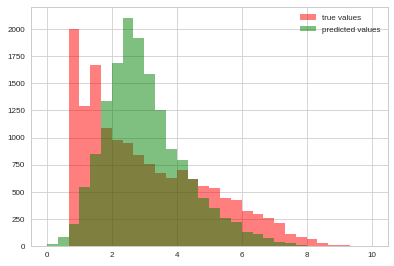

In [47]:
%%time
ridge = Ridge()
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, random_state=17)
ridge.fit(X_train, y_train);
ridge_pred = ridge.predict(X_test)
plt.hist(y_test, bins=30, alpha=.5, color='red',
         label='true values', range=(0,10));
plt.hist(ridge_pred, bins=30, alpha=.5, color='green',
         label='predicted values', range=(0,10));
plt.legend();
valid_mae = mean_absolute_error(y_test, ridge_pred)
print(valid_mae, np.expm1(valid_mae))

# 1.593240573415355 3.919665662483231
# 1.1878605076859372 2.2800560402295527
# 1.187723240593236 2.2796058273734254

In [48]:
train_data

<62313x49854 sparse matrix of type '<class 'numpy.float64'>'
	with 637575 stored elements in Compressed Sparse Row format>

In [49]:
X_train_feats.shape

(62313, 68)

In [50]:
X_test_feats.shape

(34645, 77)

#### Test dataset prep

In [51]:
%%time
author_sparse = author_vectorizer.transform(X_test_feats['author'])


title_length_types = get_title_features(X_test_feats['title'])

title_sparse = title_vectorizer.transform(X_test_feats['title'])

X_test_feats.drop(['author','content', 'title','domain', 'tags', 'published', 'url','length','target'], axis=1, inplace=True)

test_data = hstack([X_test_feats,
                     title_sparse,
                     title_length_types,                     
                     author_sparse
                     ]).tocsr()

CPU times: user 15.7 s, sys: 13 ms, total: 15.7 s
Wall time: 15.7 s


In [52]:
test_data

<34645x49854 sparse matrix of type '<class 'numpy.float64'>'
	with 323668 stored elements in Compressed Sparse Row format>

In [0]:
ridge_test_pred = ridge.predict(test_data)

In [54]:
ridge_test_pred.shape

(34645,)

In [55]:
submission.shape

NameError: ignored

In [0]:
submission = pd.read_csv('sample_submission.csv', index_col='id')

submission['log_recommends'] = ridge_test_pred
submission.to_csv('submission.csv')